In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from auxiliary import *
import zipfile
from statsmodels.api import OLS, add_constant
from linearmodels import IV2SLS, IVLIML, IVGMM, IVGMMCUE


sns.set_theme(style="ticks")

In [ ]:
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [20]:

long = pd.read_csv('data/result_long.csv')
long = sm.add_constant(long)

# heat map to check correlation between variables

<AxesSubplot:>

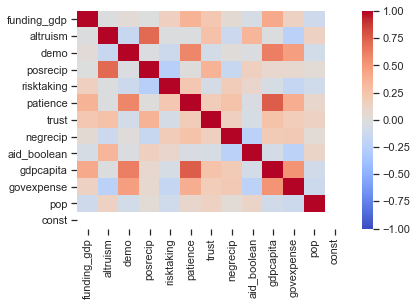

In [36]:
x = ['posrecip', 'risktaking',
       'patience', 'trust', 'negrecip', 'aid_boolean',
        'gdpcapita','govexpense', 'pop', 'const']
df_scale = long[['funding_gdp', 'altruism', 'demo'] + x]
sns.heatmap(df_scale.corr(), cmap="coolwarm", vmin=-1)

  

# simple ols to check whether limit to high income return wanted result

In [40]:

ols = IV2SLS(long['funding_gdp'], long[['altruism', 'demo'] + x], None, None)
ols.fit(cov_type='kernel').summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                            OLS Estimation Summary                            
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                      0.3361
Estimator:                        OLS   Adj. R-squared:                 0.3243
No. Observations:                 635   F-statistic:                    47.140
Date:                Sun, Dec 06 2020   P-value (F-stat)                0.0000
Time:                        16:15:21   Distribution:                 chi2(11)
Cov. Estimator:                kernel                                         
                                                                              
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
altruism       -0.0045     0.0066    -0.6812     0.4958     -0.0174      0.0084
demo           -0.0055     0.0017    -3.2177     0.0013     -0.0089     -0.0022
posrecip       -0.0073     0.0072    -1.0173     0.3090     -0.0215      0.0068
risktaking      0.0103     0.0071     1.4486     0.1474     -0.0036      0.0243
patience        0.0114     0.0179     0.6350     0.5254     -0.0238      0.0466
trust           0.0210     0.0089     2.3509     0.0187      0.0035      0.0386
negrecip       -0.0111     0.0070    -1.5788     0.1144     -0.0249      0.0027
aid_boolean    -0.0052     0.0063    -0.8271     0.4082     -0.0177      0.0072
gdpcapita    1.006e-06  3.565e-07     2.8221     0.0048   3.074e-07   1.705e-06
govexpense     -0.0001     0.0002    -0.6612     0.5085     -0.0004      0.0002
pop         -9.225e-12  1.298e-11    -0.7109     0.4771  -3.466e-11   1.621e-11
const           0.0379     0.0125     3.0308     0.0024      0.0134      0.0625
===============================================================================
"""

In [38]:
high_income = long.query('income_type == "High income"')
ols_high = IV2SLS(high_income['funding_gdp'], high_income[['altruism', 'demo'] + x], None, None)
ols_high.fit(cov_type='kernel').summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                            OLS Estimation Summary                            
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                      0.4168
Estimator:                        OLS   Adj. R-squared:                 0.3961
No. Observations:                 322   F-statistic:                    167.82
Date:                Sun, Dec 06 2020   P-value (F-stat)                0.0000
Time:                        16:14:34   Distribution:                 chi2(11)
Cov. Estimator:                kernel                                         
                                                                              
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
altruism        0.0019     0.0072     0.2590     0.7956     -0.0122      0.0159
demo           -0.0164     0.0054    -3.0735     0.0021     -0.0269     -0.0060
posrecip       -0.0207     0.0197    -1.0505     0.2935     -0.0593      0.0179
risktaking     -0.0199     0.0204    -0.9760     0.3291     -0.0598      0.0200
patience        0.0511     0.0218     2.3385     0.0194      0.0083      0.0939
trust           0.0236     0.0094     2.4975     0.0125      0.0051      0.0421
negrecip       -0.0151     0.0095    -1.5921     0.1114     -0.0337      0.0035
aid_boolean     0.0101     0.0079     1.2781     0.2012     -0.0054      0.0257
gdpcapita    6.624e-07  2.793e-07     2.3718     0.0177    1.15e-07    1.21e-06
govexpense   2.934e-06     0.0004     0.0072     0.9943     -0.0008      0.0008
pop         -1.081e-10  4.704e-11    -2.2981     0.0216  -2.003e-10   -1.59e-11
const           0.1113     0.0446     2.4940     0.0126      0.0238      0.1988
===============================================================================
"""

# simple 2sls (z = democratic) to check whether limit to high income return wanted result

In [43]:

long_clean = long[['funding_gdp', 'demo', 'altruism'] + x].dropna()
iv = IV2SLS(long_clean['funding_gdp'], long_clean[x], long_clean['altruism'], long_clean['demo'])
iv.fit(cov_type='clustered').summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                     -5.2861
Estimator:                    IV-2SLS   Adj. R-squared:                -5.3868
No. Observations:                 635   F-statistic:                    54.732
Date:                Sun, Dec 06 2020   P-value (F-stat)                0.0000
Time:                        16:20:14   Distribution:                 chi2(10)
Cov. Estimator:             clustered                                         
                                                                              
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
posrecip       -0.3247     0.1603    -2.0262     0.0427     -0.6388     -0.0106
risktaking     -0.0468     0.0355    -1.3167     0.1880     -0.1164      0.0229
patience        0.0058     0.0211     0.2760     0.7825     -0.0356      0.0472
trust           0.0503     0.0196     2.5676     0.0102      0.0119      0.0887
negrecip       -0.0281     0.0190    -1.4769     0.1397     -0.0654      0.0092
aid_boolean    -0.0611     0.0265    -2.3028     0.0213     -0.1130     -0.0091
gdpcapita   -8.376e-08  6.322e-07    -0.1325     0.8946  -1.323e-06   1.155e-06
govexpense      0.0034     0.0020     1.7146     0.0864     -0.0005      0.0074
pop         -6.014e-11  3.016e-11    -1.9943     0.0461  -1.192e-10  -1.035e-12
const          -0.0399     0.0382    -1.0452     0.2960     -0.1148      0.0350
altruism        0.4040     0.2023     1.9969     0.0458      0.0075      0.8005
===============================================================================

Endogenous: altruism
Instruments: demo
Clustered Covariance (One-Way)
Debiased: False
Num Clusters: 635
"""

In [42]:
high_income_clean = high_income[['funding_gdp', 'demo', 'altruism'] + x].dropna()
iv_high = IV2SLS(high_income_clean['funding_gdp'], high_income_clean[x], high_income_clean['altruism'], high_income_clean['demo'])
iv_high.fit(cov_type='clustered').summary


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                     -5.2861
Estimator:                    IV-2SLS   Adj. R-squared:                -5.3868
No. Observations:                 635   F-statistic:                    54.732
Date:                Sun, Dec 06 2020   P-value (F-stat)                0.0000
Time:                        16:18:39   Distribution:                 chi2(10)
Cov. Estimator:             clustered                                         
                                                                              
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
posrecip       -0.3247     0.1603    -2.0262     0.0427     -0.6388     -0.0106
risktaking     -0.0468     0.0355    -1.3167     0.1880     -0.1164      0.0229
patience        0.0058     0.0211     0.2760     0.7825     -0.0356      0.0472
trust           0.0503     0.0196     2.5676     0.0102      0.0119      0.0887
negrecip       -0.0281     0.0190    -1.4769     0.1397     -0.0654      0.0092
aid_boolean    -0.0611     0.0265    -2.3028     0.0213     -0.1130     -0.0091
gdpcapita   -8.376e-08  6.322e-07    -0.1325     0.8946  -1.323e-06   1.155e-06
govexpense      0.0034     0.0020     1.7146     0.0864     -0.0005      0.0074
pop         -6.014e-11  3.016e-11    -1.9943     0.0461  -1.192e-10  -1.035e-12
const          -0.0399     0.0382    -1.0452     0.2960     -0.1148      0.0350
altruism        0.4040     0.2023     1.9969     0.0458      0.0075      0.8005
===============================================================================

Endogenous: altruism
Instruments: demo
Clustered Covariance (One-Way)
Debiased: False
Num Clusters: 635
"""